# GeoPandas Choropleth Map of World Happiness Scores
* Geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.

In [3]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
# View first 5 rows of the World shape file data
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
# Inspect count of the World shape file data
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [6]:
# Merge data sets

# merge both data sets using name/Country as unique identifiers
for_plotting = world.merge(Comparison_data, left_on = 'name', right_on = 'Country')

# check the occurrence
for_plotting.info() 


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   pop_est              128 non-null    int64   
 1   continent            128 non-null    object  
 2   name                 128 non-null    object  
 3   iso_a3               128 non-null    object  
 4   gdp_md_est           128 non-null    float64 
 5   geometry             128 non-null    geometry
 6   Country              128 non-null    object  
 7   Gov Trust Average    128 non-null    float64 
 8   Generocity Average   128 non-null    float64 
 9   Health Average       128 non-null    float64 
 10  Family Average       128 non-null    float64 
 11  Economy GDP Average  128 non-null    float64 
 12  Freedom Average      128 non-null    float64 
 13  Happiness Average    128 non-null    float64 
dtypes: float64(8), geometry(1), int64(1), object(4)
memory usage: 15.0

In [ ]:
#plot merged file.

ax = for_plotting.plot(column='Happiness Average', cmap = 'YlGnBu', figsize=(15,10), k=3, legend = True, 
                                legend_kwds={'label': "Happiness Score Per Country",'orientation':"horizontal"},
                                missing_kwds={'color': 'lightgrey'})
                                
ax.set_title('World Happiness Report \n 2015 - 2019', fontdict= {'fontsize':14})

![title](Images/WHR_ChoroplethMap.png)

## Analysis
- Using a _geopandas choropleth map_ to provide a visual of happiness score of different countries
- Note some countries are missing; this is due to discrepencies between country names between our data and the dataset from GeoPandas
  - e.g. United States vs United States of America
- If additional time were available, our data may be edited to ensure that it matches GeoPandas data

# What are the Top 10 Happiest Countries?

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [2]:
# Show path to csv files
original_data = "Resources/completData.csv"

# Read csv files through Pandas
data = pd.read_csv(original_data)
data

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Economy (GDP per Capita) 2015,Family 2015,Health (Life Expectancy) 2015,Freedom 2015,Trust (Government Corruption) 2015,Generosity 2015,...,Trust (Government Corruption) 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,Economy (GDP per Capita) 2019,Family 2019,Health (Life Expectancy) 2019,Freedom 2019,Trust (Government Corruption) 2019,Generosity 2019
0,Switzerland,Western Europe,1.0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,...,0.357,0.256,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263
1,Iceland,Western Europe,2.0,7.561,1.302,1.402,0.948,0.629,0.141,0.436,...,0.138,0.353,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
2,Denmark,Western Europe,3.0,7.527,1.325,1.361,0.875,0.649,0.484,0.341,...,0.408,0.284,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
3,Norway,Western Europe,4.0,7.522,1.459,1.331,0.885,0.670,0.365,0.347,...,0.340,0.286,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
4,Canada,North America,5.0,7.427,1.326,1.323,0.906,0.633,0.330,0.458,...,0.291,0.321,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Rwanda,Sub-Saharan Africa,154.0,3.465,0.222,0.774,0.429,0.592,0.552,0.226,...,0.444,0.200,152.0,3.334,0.359,0.711,0.614,0.555,0.411,0.217
136,Benin,Sub-Saharan Africa,155.0,3.340,0.287,0.354,0.319,0.485,0.080,0.183,...,0.067,0.163,102.0,4.883,0.393,0.437,0.397,0.349,0.082,0.175
137,Syria,Middle East and Northern Africa,156.0,3.006,0.663,0.475,0.722,0.157,0.189,0.472,...,0.144,0.376,149.0,3.462,0.619,0.378,0.440,0.013,0.141,0.331
138,Burundi,Sub-Saharan Africa,157.0,2.905,0.015,0.416,0.224,0.119,0.101,0.197,...,0.076,0.149,145.0,3.775,0.046,0.447,0.380,0.220,0.180,0.176


In [3]:
# Summary of Happiness Score per year
Happiness_df = data[["Country", "Happiness Score 2015", "Happiness Score 2016", "Happiness Score 2017", "Happiness Score 2018", "Happiness Score 2019"]]
Happiness_df = Happiness_df.groupby("Country")
Happiness_df.mean()

#Find the averages of the data
Happ_df = Happiness_df.mean().reset_index()
Happ_df["Happiness Average"] = Happ_df.mean(axis=1)
Happ_df

# Filter the DataFrame down only to those columns to chart
Happiness_plot = Happ_df[["Country", "Happiness Average"]]

# Set the index to be "Country" so they will be used as labels
Happiness_plot = Happiness_plot.set_index("Country")
Happiness_plot.head()

,Happiness Average
Country,
Afghanistan,3.5128
Albania,4.7126
Algeria,5.6676
Argentina,6.4594
Armenia,4.3932


In [4]:
# List top 10 Countries with the highest average Happiness Average
highest_10_Happiness = Happiness_plot.nlargest(10, ['Happiness Average'])
highest_10_Happiness=highest_10_Happiness.reset_index()
highest_10_Happiness

,Country,Happiness Average
0,Denmark,7.5460
1,Norway,7.5410
2,Finland,7.5378
3,Switzerland,7.5114
4,Iceland,7.5110
5,Netherlands,7.4046
6,Canada,7.3506
7,Sweden,7.3192
8,New Zealand,7.3130
9,Australia,7.2762


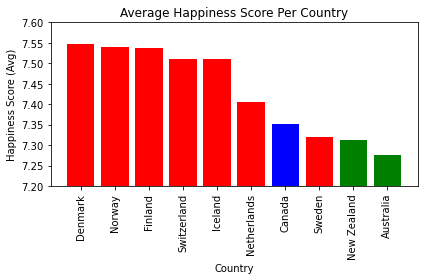

In [5]:
# Create bar chart
labels = highest_10_Happiness["Country"]
values = highest_10_Happiness["Happiness Average"]

# Change the bar colors here
plt.bar(labels, values, color=['red', 'red', 'red', 'red', 'red', 'red', 'blue','red','green','green'])

plt.xticks(rotation=90)
plt.ylim(7.2, 7.6)

plt.title("Average Happiness Score Per Country")
plt.ylabel('Happiness Score (Avg)')
plt.xlabel('Country')

# Show plot
plt.tight_layout()
plt.show()

## Analysis
- Countries are colour coordinated based on region
- Australia sits in the top 10 happiest countries

# Which Region has the Highest Happiness Score?

In [11]:
# Summary of Happiness per year
Happiness_df = data[["Country", "Region", "Happiness Score 2015", "Happiness Score 2016", "Happiness Score 2017", "Happiness Score 2018", "Happiness Score 2019"]]
Happiness_df = Happiness_df.groupby("Region")
Happiness_df.mean()

#Find the averages of the data
Happ_df = Happiness_df.mean().reset_index()
Happ_df["Happiness Average"] = Happ_df.mean(axis=1)
Happ_df

# Filter the DataFrame down only to those columns to chart
Happiness_plot = Happ_df[["Region", "Happiness Average"]]

# Set the index to be "Region" so they will be used as labels
Happiness_plot = Happiness_plot.set_index("Region")
Happiness_plot = Happiness_plot.reset_index()

# Rank regions in descending order
Happiness_plot = Happiness_plot.sort_values(by=['Happiness Average'], ascending=False)
Happiness_plot


,Region,Happiness Average
0,Australia and New Zealand,7.294600
5,North America,7.174700
9,Western Europe,6.789330
3,Latin America and Caribbean,6.003100
2,Eastern Asia,5.514850
1,Central and Eastern Europe,5.437643
6,Southeastern Asia,5.389475
4,Middle East and Northern Africa,5.242200
7,Southern Asia,4.580657
8,Sub-Saharan Africa,4.190935


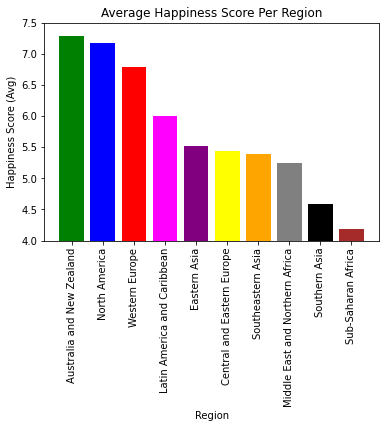

In [12]:
labels = Happiness_plot["Region"]
values = Happiness_plot["Happiness Average"]

# Change the bar colors here
plt.bar(labels, values, color=['green', 'blue', 'red', 'magenta', 'purple', 'yellow', 'orange','grey','black','brown'])

plt.xticks(rotation=90)

plt.ylim(4, 7.5)

plt.title("Average Happiness Score Per Region")
plt.ylabel('Happiness Score (Avg)')
plt.xlabel('Region')

# Show plot
plt.show()

## Analysis
- Australia and New Zealand region has the highest average happiness score
- Western Europe sits third despite having 7 countries in the top 10 happiest countries
- Sub-Sharan Africa is last in average happiness score

In [32]:
# Create a group based on the values in the 'region' column
region_group = data.groupby('Region')

# Count how many times each region appears in our group
count_regions = region_group['Region'].count()

count_regions = count_regions.sort_values(ascending = False)

count_regions

Region
Sub-Saharan Africa                 31
Central and Eastern Europe         28
Western Europe                     20
Latin America and Caribbean        20
Middle East and Northern Africa    18
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

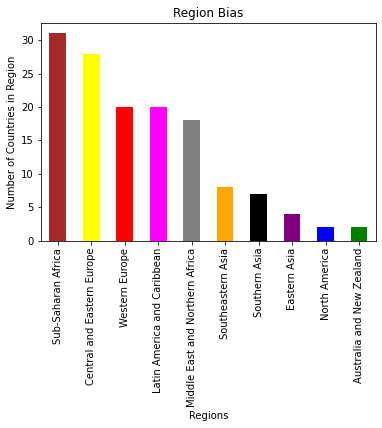

In [34]:
# Create a bar chart based off of the Regions
count_chart = count_regions.plot(kind='bar', title="Region Bias", color = ["brown", "yellow", "red", "magenta", "grey", "orange", "black", "purple", "blue", "green"])

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Regions")
count_chart.set_ylabel("Number of Countries in Region")


plt.show()

## Analysis
- Certain bias in regions as the number of countries in each region differs greatly for some groups
- Australia and New Zealand only contain two countries. This will cause some bias in the results found
- With additional time, the countries could be grouped into larger regions
  - e.g. Combining Australia, New Zealand and Asia into Oceania

# What Makes a Country Happy?

In [2]:
# Show path to csv files
original_data = "Resources/Country_output.csv"

# Read csv files through Pandas
Comparison_data = pd.read_csv(original_data)
Comparison_data

,Country,Gov Trust Average,Generocity Average,Health Average,Family Average,Economy GDP Average,Freedom Average,Happiness Average
0,Afghanistan,0.0580,0.2678,0.2546,0.4098,0.3570,0.1178,3.5128
1,Albania,0.0432,0.1678,0.7876,0.7550,0.9386,0.3718,4.7126
2,Algeria,0.1462,0.0690,0.6652,1.0742,1.0130,0.1784,5.6676
3,Argentina,0.0644,0.0924,0.7608,1.3308,1.1110,0.4818,6.4594
4,Armenia,0.0388,0.0824,0.6980,0.8908,0.8392,0.2158,4.3932
...,...,...,...,...,...,...,...,...
135,Venezuela,0.0714,0.0572,0.6838,1.3232,1.0524,0.2136,5.5314
136,Vietnam,0.0920,0.1958,0.7228,1.1382,0.7234,0.5772,5.1546
137,Yemen,0.0672,0.0968,0.3654,0.8654,0.4892,0.2442,3.6258
138,Zambia,0.0974,0.2186,0.3028,0.9324,0.5716,0.4622,4.5844


In [20]:
# Generate the correlation matrix and find the strongest positive and negative correlations
all_data = Comparison_data.corr()
all_data.unstack().sort_values()

Economy GDP Average  Generocity Average    -0.025530
Generocity Average   Economy GDP Average   -0.025530
Health Average       Generocity Average     0.032844
Generocity Average   Health Average         0.032844
                     Family Average         0.069850
Family Average       Generocity Average     0.069850
Generocity Average   Happiness Average      0.150190
Happiness Average    Generocity Average     0.150190
Gov Trust Average    Family Average         0.259132
Family Average       Gov Trust Average      0.259132
Generocity Average   Gov Trust Average      0.307336
Gov Trust Average    Generocity Average     0.307336
Health Average       Gov Trust Average      0.319317
Gov Trust Average    Health Average         0.319317
Generocity Average   Freedom Average        0.343940
Freedom Average      Generocity Average     0.343940
                     Health Average         0.370710
Health Average       Freedom Average        0.370710
Gov Trust Average    Economy GDP Average    0.

                     Gov Trust Average  Generocity Average  Health Average  \
Gov Trust Average             1.000000            0.307336        0.319317   
Generocity Average            0.307336            1.000000        0.032844   
Health Average                0.319317            0.032844        1.000000   
Family Average                0.259132            0.069850        0.641513   
Economy GDP Average           0.375456           -0.025530        0.847967   

                     Family Average  Economy GDP Average  Freedom Average  \
Gov Trust Average          0.259132             0.375456         0.509484   
Generocity Average         0.069850            -0.025530         0.343940   
Health Average             0.641513             0.847967         0.370710   
Family Average             1.000000             0.700215         0.487547   
Economy GDP Average        0.700215             1.000000         0.390637   

                     Happiness Average  
Gov Trust Average          

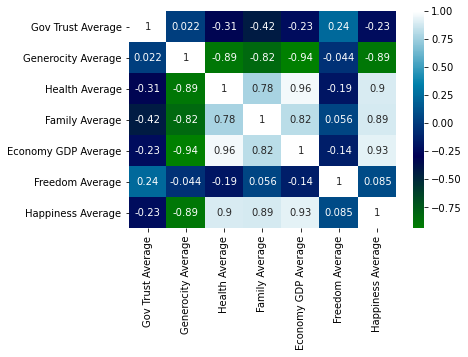

In [39]:
print (all_data.head())
sns.heatmap(all_data.corr(),annot=True, cmap='ocean')
plt.show()

## Analysis
When generating a correlation heatmap using the seaborn library you can easily see the top three variables contributing to happiness are;
- Economy (GDP per Capita)
- Health
- Family

# Does Economy (GDP Per Capita) Correlate with Happiness Score?

The r-value is: 0.6683439315322106
The p-value is: 6.992878703186441e-35


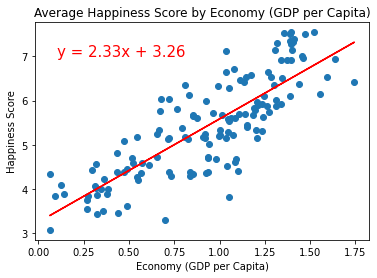

In [36]:
# Economy (GDP per Capita) all Countries

# Linear regression X and Y axis
x_values = Comparison_data["Economy GDP Average"]
y_values = Comparison_data["Happiness Average"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.title(f'Average Happiness Score by Economy (GDP per Capita)')
plt.annotate(line_eq,(0.1,7),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

# Show plot
plt.show()

## Analysis
- An r-value of 0.67 indicates that there is a positive relationship between Economy (GDP per Capita) and Average Happiness Score
- Our null hypothesis, H0: Happiness has no relationship with Economy (GDP per capita)
- The p-value is 6.992878703186441e-35 which is < 5%, hence we reject the null hypothesis and accept the alternate hypothesis, H1: Happiness does have a relationship with Economy (GDP per Capita)

# How Does Australia Compare with Other Countries?

Australia is shown as a red 'x' on the boxplot


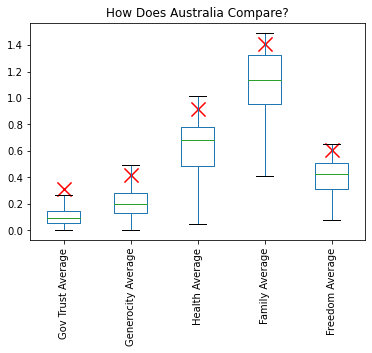

In [38]:
print("Australia is shown as a red 'x' on the boxplot")
# Configure boxplot
fig, ax = plt.subplots()
Comparison_data.boxplot(column=["Gov Trust Average", "Generocity Average", "Health Average", "Family Average", "Freedom Average"], rot = 90, showfliers = False, grid = False)

# Create mask for country Australia
mask = Comparison_data.Country.str.startswith('Australia', na=False)

# Create a scatterplot using mask
ax.scatter(1, Comparison_data[mask]["Gov Trust Average"], 
           marker='x', s=200, color='r')
ax.scatter(2, Comparison_data[mask]["Generocity Average"], 
           marker='x', s=200, color='r')
ax.scatter(3, Comparison_data[mask]["Health Average"], 
           marker='x', s=200, color='r')
ax.scatter(4, Comparison_data[mask]["Family Average"], 
           marker='x', s=200, color='r')
ax.scatter(5, Comparison_data[mask]["Freedom Average"], 
           marker='x', s=200, color='r')
plt.title("How Does Australia Compare?")
plt.show()

Australia is shown as a red 'x' on the boxplot


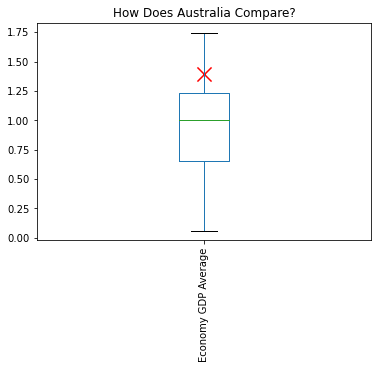

In [37]:
print("Australia is shown as a red 'x' on the boxplot")

# Configure boxplot
fig, ax = plt.subplots()
Comparison_data.boxplot(column=["Economy GDP Average"], rot = 90, showfliers = False, grid = False)

# Create mask for country Australia
mask = Comparison_data.Country.str.startswith('Australia', na=False)
ax.scatter(1, Comparison_data[mask]["Economy GDP Average"], 
           marker='x', s=200, color='r')
plt.title("How Does Australia Compare?")
plt.show()

## Analysis
- Australia ranks above 75% other countries when it comes to our scores on the variables
- Our Government Trust score is our best category as our score is considered an outlier when compared to the rest of the Government Trust scores
- Our high scores are reflected with Australia being ranked 10 in the happiest countries (as we have seen before)